# Análisis de los 25 retailers más grandes de Estados Unidos

Por Harry Vargas - Data Analyst / Data Scientist

In [ ]:
!pip install statsmodels==0.13.2

     |████████████████████████████████| 9.8 MB 23.3 MB/s 
     |████████████████████████████████| 233 kB 33.8 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Importar librerías a emplear

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
sns.set_theme(context='notebook',palette='magma')

In [ ]:
# Cargar archivo como dataframe
retail = pd.read_csv('/work/retail/largest_us_retailers_9b00dc73-a938-46cd-af17-fcb2bd67301f.csv')
retail

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


In [ ]:
retail.dtypes

Company                object
Sales                   int64
Stores                float64
Sales/Avg. Store      float64
Store Count Growth    float64
Category               object
dtype: object

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             25 non-null     object 
 1   Sales               25 non-null     int64  
 2   Stores              23 non-null     float64
 3   Sales/Avg. Store    23 non-null     float64
 4   Store Count Growth  23 non-null     float64
 5   Category            24 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ KB


In [ ]:
retail.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230
std,125405.727644,4038.708714,40.625277,0.068552
min,16592.000000,231.000000,1.563919,-0.059515
25%,24402.000000,1029.000000,11.263462,-0.001860
50%,34980.000000,1828.000000,25.997733,0.019520
75%,71687.000000,4242.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

Se puede evidenciar una distribución asimétrica para las ventas, debido a la presencia de valores atípicos mayores que la media. Walmart es la compañia con valores de Ventas muy superior al resto. registra ventas por 658.119 millones de USD. Lo que es más de 6 veces más que el resto de las empresas de estudio. Para que el promedio de Ventas tenga sentido y sea representativo es necesario no tener en consideración el aporte de Walmart.

El promedio de ventas quitando la compañia dominante es de 46.602 millones de USD.

Promedio de la distribución completa: 71063.08
Promedio quitando Walmart: 46602.416667

<AxesSubplot:xlabel='Sales', ylabel='Count'>

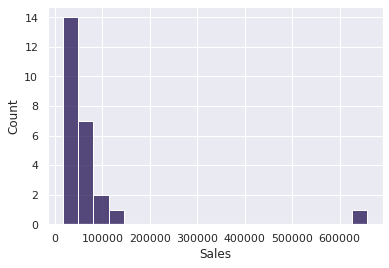

In [ ]:
sns.histplot(data = retail, x = 'Sales')

In [ ]:
# Walmart es el atípico con mayores ingresos por Ventas del dataset con un valor de 658.119 dólares

retail.sort_values(by = ['Sales'], ascending = False)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


In [ ]:
# Calculo del promedio quitando dato atipico Walmart

print('Promedio de la distribución completa: {:.0f} millones de USD'.format(retail['Sales'].mean()))
print('Promedio quitando Walmart: {:.0f} millones de USD'.format(retail['Sales'].sort_values(ascending = False)[1:25].mean()))

Promedio de la distribución completa: 71063 millones de USD
Promedio quitando Walmart: 46602 millones de USD


In [ ]:
# Otra forma de calcular el promedio usando numpy

np.sort(np.array(retail['Sales']))[0:24].mean()

46602.416666666664

In [ ]:
# Eliminar Walmart, dato atípico en relación entre Tiendas y Ventas

retail_2 = retail.drop(index=0)

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

Analizando en función de la mediana de la distribución se puede afirmar que **la mayoría de las empresas generaron 34,694 millones de dólares en Ventas**. 

Dado que la pregunta de negocio es ambigua, también se podría afirmar que **la mayoría de empresas tuvieron ventas entre 23,860 y 71,327 millones de dólares**, tomando como referencia el cuartil 1 y 2 de la distribución.

Nota: en este caso se decidió usar el dataset sin Walmart para no alterar las estadísticas de posición.

Text(0.5, 0.98, 'Distibución de ventas para los 25 retails más importantes de USA')

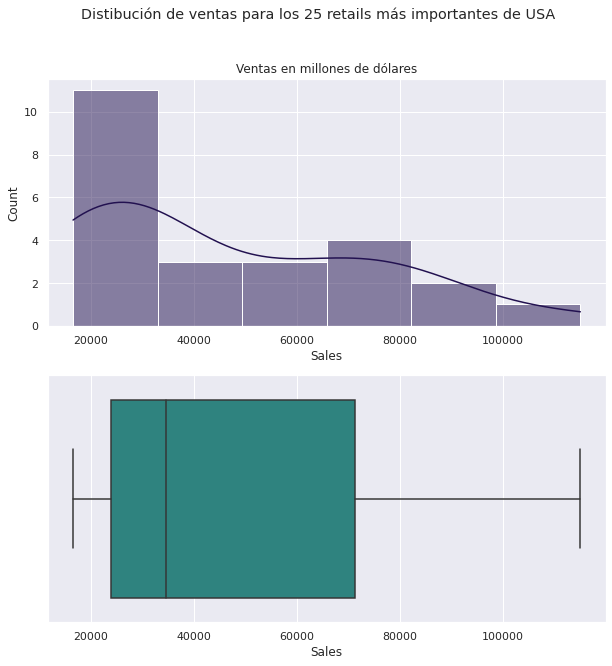

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (10,10))

sns.histplot(data = retail_2, x = 'Sales', ax=ax[0], kde=True)
sns.boxplot(data = retail_2, x = 'Sales', ax=ax[1], palette='viridis')

ax[0].set_title('Ventas en millones de dólares')
fig.suptitle('Distibución de ventas para los 25 retails más importantes de USA')

In [ ]:
print(retail['Sales'].median())
print(retail_2['Sales'].median())
print(np.quantile(retail_2['Sales'],[0.25,0.75]))

34980.0
34694.0
[23860.   71327.75]


### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

**La mayoría de empresas tienen entre 959 y 3640 tiendas**, tomando como referencia el cuartil 1 y 3 de la distribución donde se agrupa el 50% de los datos. También es válido afirmar que **la mayoría de empresas tienen más de 1800 tiendas**, basado en la mediana de la distribución.

Nota: en este caso se decidió usar el dataset sin Walmart para no alterar las estadísticas de posición.

Text(0.5, 0.98, 'Distibución de cantidad de tiendas para los 25 retails más importantes de USA')

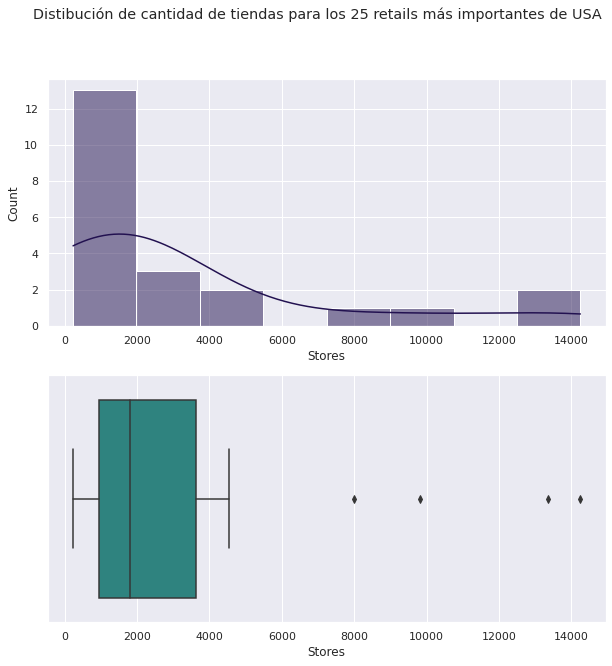

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (10,10))

sns.histplot(data = retail_2, x = 'Stores', ax=ax[0], kde=True)
sns.boxplot(data = retail_2, x = 'Stores', ax=ax[1], palette='viridis')

fig.suptitle('Distibución de cantidad de tiendas para los 25 retails más importantes de USA')

In [ ]:
print(retail['Stores'].median())
print(retail_2['Stores'].median())
print(np.percentile(retail_2.dropna()['Stores'],[25,75]))

1828.0
1800.0
[ 959.   3640.75]


### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

Al graficar la cantidad de tiendas en función de las Ventas se puede obsevar un dato fuera de tendencia, de nuevo Walmart se comporta como un atípico, para poder generar conclusiones validas vamos a realizar el análisis de correlación quitando este registro.

Text(0.5, 1.0, 'Tendencia sin Walmart')

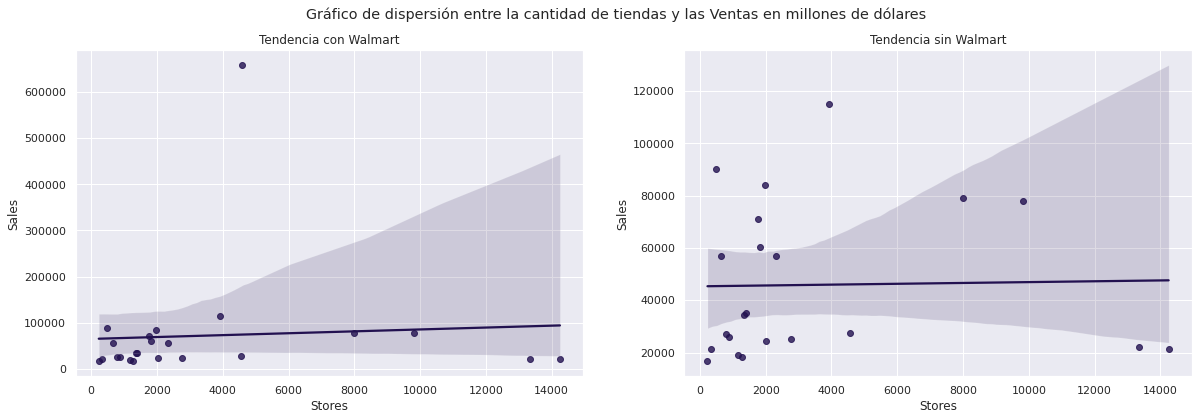

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (20,6))
sns.regplot(data = retail, x = 'Stores', y = 'Sales', ax = ax[0])
sns.regplot(data = retail_2, x = 'Stores', y = 'Sales',ax = ax[1])
fig.suptitle('Gráfico de dispersión entre la cantidad de tiendas y las Ventas en millones de dólares')
ax[0].set_title('Tendencia con Walmart')
ax[1].set_title('Tendencia sin Walmart')

Es bastante claro en ambas visualizaciones que **no existe una relación directa entre la cantidad de tiendas y las ventas**. Empresas como Dolar General y Dolar Tree tiene una amplia cantidad de tiendas sin embargo se encuentran en el cuartil más bajo en Ventas. Así mismo empresas como Costco y Kroger con ventas similares poseen una diferencia significativa en cantidad de tiendas, 495 y 3951, respectivamente. Kroger tiene 8 veces más tiendas con un margen de ventas bastante cercano con Costco. En la siguiente visualización interactiva se puede observar y hacer zoom de acuerdo a las necesidades de análisis.

Por último, los coeficientes de correlación calculados demuestran que la porción de varianza explicada es muy pequeña y la relación es muy débil.

In [ ]:
fig2 = px.scatter(retail, x = 'Stores',y= 'Sales', hover_name='Company', trendline='ols')
fig2.show()

In [ ]:
results = px.get_trendline_results(fig2)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                   0.08449
Date:                Fri, 25 Feb 2022   Prob (F-statistic):              0.774
Time:                        19:15:12   Log-Likelihood:                -303.05
No. Observations:                  23   AIC:                             610.1
Df Residuals:                      21   BIC:                             612.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.538e+04   3.71e+04      1.764      0.092   -1.17e+04    1.42e+05
x1             2.0498      7.052      0.291      0.774     -12.616      16.715
==============================================================================
Omnibus:                       53.878   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.710
Skew:                           4.116   Prob(JB):                     5.59e-68
Kurtosis:                      18.981   Cond. No.                     6.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print('Coeficiente de correlación de Pearson datos completos: {:.4f}'.format(retail['Sales'].corr(retail['Stores'], method='pearson')))

print('Coeficiente de correlación de Pearson quitando Walmart: {:.4f}'.format(retail_2['Sales'].corr(retail_2['Stores'], method='pearson')))

Coeficiente de correlación de Pearson datos completos: 0.0633
Coeficiente de correlación de Pearson quitando Walmart: 0.0229


### 5. ¿Cuál es el rango que existe entre las ventas?

El rango considerando Walmart (que en nuestro caso es el Bill Gates de la metáfora*) es 641,527 millones de dólares, sin embargo considerando el aumento significativo en la varianza que ocasiona esta observación, es mejor analizar el rango excluyendo Walmart. **En ese caso el rango de ventas es de 98,445 millones de dólares.**

!* Revisar metáfora de Bill Gates en el capítulo 2 de Naked Statistics.

In [ ]:
rango_full = max(retail['Sales'])-min(retail['Sales'])
rango = max(retail_2['Sales'])-min(retail_2['Sales'])

print(rango_full)
print(rango)

641527
98445


### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

Las 5 empresas con mayor cantidad de tiendas son:
* Dollar Tree
* Dollar General
* CSV incl. Target
* Walgreen Boots
* Walmart US

De esas 5 únicamente **Walmart US y Walgreen Boots** se encuentran dentro de las 5 empresas con mayores ventas. Esto sirve para ejemplificar la nula relación encontrada entre Ventas y Tiendas.

In [ ]:
# 5 compañias con mayor cantidad de tiendas

mas_tiendas = retail.nlargest(5,'Stores')
mas_tiendas

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


In [ ]:
# Compañías top 5 en cantidad de tiendas que pertenecen al top 5 en ventas

mas_tiendas = retail.nlargest(5,'Stores')
mas_ventas = retail.nlargest(5,'Sales')

interseccion = pd.merge(mas_tiendas, mas_ventas, how='inner', on= 'Company')
interseccion

,Company,Sales_x,Stores_x,Sales/Avg. Store_x,Store Count Growth_x,Category_x,Sales_y,Stores_y,Sales/Avg. Store_y,Store Count Growth_y,Category_y
0,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,78924,8002.0,9.810927,-0.010511,Drug Stores
1,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,658119,4574.0,65.649725,0.012843,Supercenters


## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

**Supercenter es la categoría con mayores ventas promedio.** A esta categoria pertenecen Walmart, Target y Meijer.
Dejando de lado Walmart la categoría con mayor ventas promedio es Warehouse Club, donde solo se encuentran Sam's club y Costco

<AxesSubplot:xlabel='Sales', ylabel='Category'>

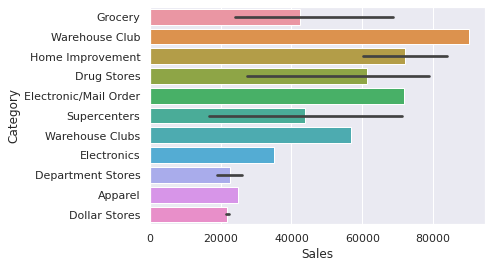

In [ ]:
sns.barplot(data=retail_2, y='Category',x = 'Sales')

<AxesSubplot:xlabel='Sales', ylabel='Category'>

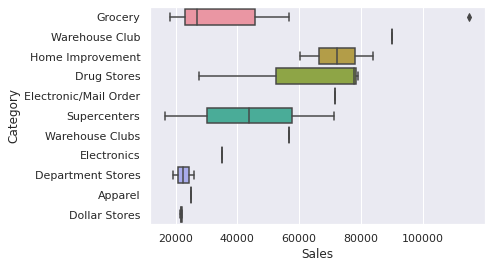

In [ ]:
sns.boxplot(data = retail_2, x = 'Sales',y='Category')

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

**Costco es la empresa cuya relación Ventas / tiendas es mayor.** Es decir, teniendo menos tiendas genera grandes Ventas, seguido de Sam's CLub y Meijer. Es bastante peculiar que Walmart US se encuentra hasta la quinta posición para esta variable.

<AxesSubplot:xlabel='Sales/Avg. Store', ylabel='Company'>

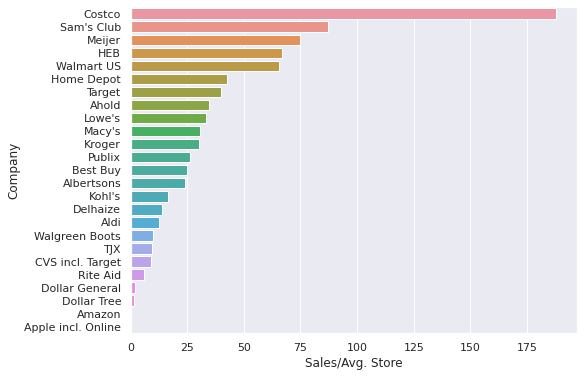

In [ ]:
tiendas_ordenadas = list(retail.set_index('Company').sort_values(by='Sales/Avg. Store', ascending=False).index)

fix, ax = plt.subplots(figsize = (8,6))
sns.barplot(data = retail, x = 'Sales/Avg. Store', y= 'Company', order = tiendas_ordenadas)

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

Se aplica una función de mapeo basado en los valores faltates de la columan Sales. Se toman como empresas online aquellas que no reportarn ninguna tienda física.

Se puede observar que Amazon y Apple son las únicas dos empresas que operan exclusivamente con ventas online. Las ventas promedio de las empresas que solo operan de forma online es superior a las que trabajan de forma hibrida o exclusivamente a través de tiendas. También se puede apreciar que la mediana de las ventas también es mayor para las empresas que operan solamente de manera online. Sin embargo, se puede apreciar tanto en el boxplot como en el histograma que la dispersión de los datos no permite hacer una diferenciación significativa de las Ventas para las dos clases de empresa.

**Conclusión: No hay evidencia significativa que permita afirmar que las ventas de las empresas que operaran exclusivamente online destaquen respecto a las otras.**

In [ ]:
# Se aplica un mapeo a ambos dataframes dependiendo si en la columna Stores tienen

retail['Online_sales'] = retail['Stores'].isna().map({False:'No',True: 'Si'})
retail_2['Online_sales'] = retail['Stores'].isna().map({False:'No',True: 'Si'})

retail[retail['Online_sales'] == 'Si' ]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Online_sales
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,Si
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN,Si


<AxesSubplot:xlabel='Sales', ylabel='Count'>

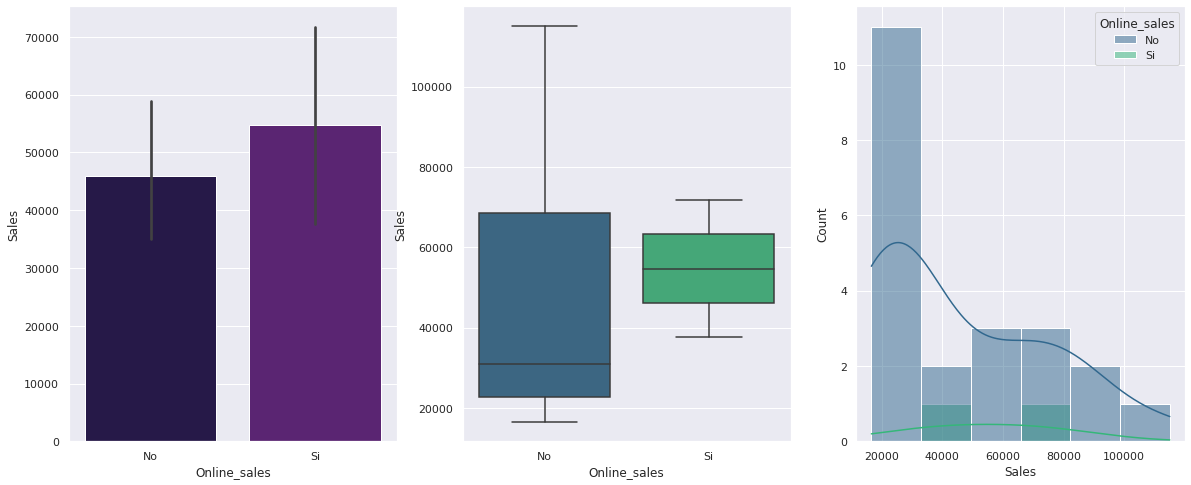

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (20,8))

sns.barplot(data = retail_2, x ='Online_sales',y='Sales', ax = ax[0])
sns.boxplot(data = retail_2, x = 'Online_sales', y = 'Sales', palette='viridis', ax= ax[1])
sns.histplot(data = retail_2, x = 'Sales', palette='viridis', ax= ax[2], hue= 'Online_sales',kde=True)


## III. Tus propias preguntas

### 10. Pregunta

### 11. Pregunta

### 12. Pregunta

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ba04528-a318-4215-a2e2-655bbb58b00e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>